In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob 
import matplotlib.pyplot as plt
import matplotlib as mpl

sns.set_context("talk")
data_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/"

# load families summary
summary_homfam_exthomfam = pd.read_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/01_summary_homfam_exthomfam.csv")
summary_homfam = summary_homfam_exthomfam[summary_homfam_exthomfam.dataset == "homfam"]
families = summary_homfam.drop(["subset", "file", "min_length", "max_length", "perc_ref_total", "dataset"], axis = 1)

# 1. PREP SCORES
def get_scores(score_files): 
    def parse_score(score_file): 
        return(pd.read_csv(score_file,sep = ";", header = None).drop(4, axis = 1))

    scores = pd.concat(list(map(parse_score, score_files)))
    scores = scores.iloc[:,0:4]
    scores.columns = ['name', 'sp', 'tc', 'column']
    return(scores)

# Categories
categories_file = "/home/luisasantus/Desktop/crg_cluster/data/structures_collections/homfam/metadata/categories_learnMSA.txt"
categories = pd.read_csv(categories_file, sep =" ", header =None)
categories.columns = ["family", "category", "n"]
#sns.histplot(categories, y = "category")

In [2]:
regressive_sequence = get_scores((glob.glob(os.path.join(data_dir, "evaluation/score/*.regressive.*.MBED*"))))
regressive_sequence[["family", "algo","bucket", "align_method" , "tree_method"]] = regressive_sequence.name.str.split(".", expand = True)
regressive_sequence = pd.merge(regressive_sequence, families, on = "family")
REG_MAFFT =regressive_sequence[regressive_sequence.align_method == "MAFFT-GINSI"]
REG_famsa =regressive_sequence[regressive_sequence.align_method == "FAMSA"]
REG = pd.merge(REG_MAFFT, REG_famsa, on = "family")
REG = pd.merge(REG, categories, on = "family")

[Text(0.5, 0, 'mafft'), Text(0, 0.5, 'famsa')]

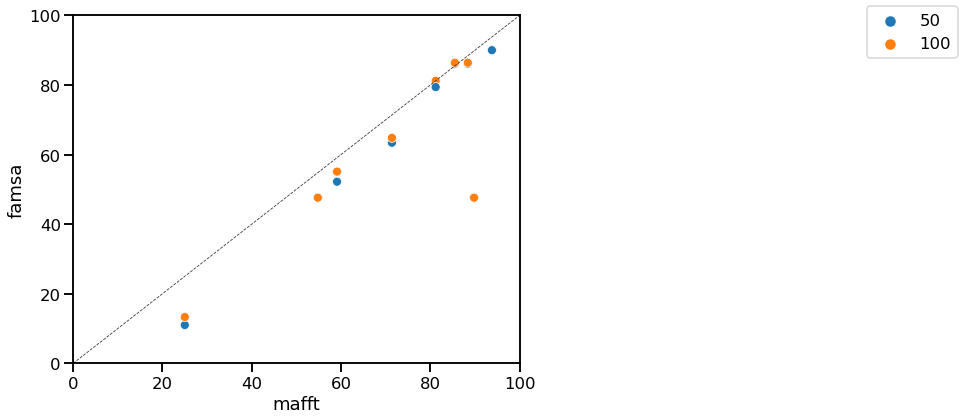

In [3]:
size_fig = 1
f, ax = plt.subplots(figsize=(8*size_fig,6.4*size_fig ))
ax = sns.scatterplot(data = REG, x = "sp_x", y = "sp_y", hue = "bucket_y")
ax.axline((1, 1), slope=1, ls="--", c=".2", lw = 0.8)
ax.legend(bbox_to_anchor=(2, 1.05))
# Axis limits
plt.xlim([0, 100])
plt.ylim([0, 100])
xlabel = "mafft"
ylabel = "famsa"
# Axis labels
ax.set(xlabel=xlabel,
       ylabel=ylabel ) 
    

In [6]:
# LOAD ALIGNMENT SCORES

# Now check on few families, with N=100, famsa, mafft-ginsi 
fams = ["hip", "cryst", "seatoxin", "blmb", "DEATH", "sdr", "Acetyltransf"]
methods = ["MAFFT-GINSI", "FAMSA"]
bucket_size = "100"
cols = ["family", "sp","tc", "method", "n_sequences"]

# REGRESSIVE FAMSA and MAFFT GINSI 
regressive_sequence = get_scores((glob.glob(os.path.join(data_dir, "evaluation/score/*.regressive.*.MBED*"))))
regressive_sequence[["family", "algo","bucket", "align_method" , "tree_method"]] = regressive_sequence.name.str.split(".", expand = True)
regressive_sequence = pd.merge(regressive_sequence, families, on = "family")
regressive_sequence = regressive_sequence[(regressive_sequence.family.isin(fams)) & (regressive_sequence.bucket == bucket_size) & (regressive_sequence.align_method.isin(methods))]
regressive_sequence["method"] = regressive_sequence.algo + "_" + regressive_sequence["align_method"]

# REGRESSIVE FOLDSEEK 
tc_fs = get_scores(glob.glob(os.path.join(data_dir, "evaluation/score/*foldeek_regressive*")))
tc_fs[["family", "algo", "bucketsize","method", "tree_method"]] = tc_fs.name.str.split(".", expand = True)
tc_fs = pd.merge(tc_fs, families, on = "family")

# To check later --> DYNAMIC 
dynamic = get_scores((glob.glob(os.path.join(data_dir, "evaluation/score/*dynamic.*.MBED*"))))
dynamic[["family", "method", "a", "a", "a", "bucket", "tree_method","library_method"]] = dynamic.name.str.split(".", expand = True)
dynamic = pd.merge(dynamic, families, on = "family")
dynamic = dynamic[(dynamic.family.isin(fams))]

# FAMSA
famsa = get_scores((glob.glob(os.path.join(data_dir, "evaluation/score/*progressive.*FAMSA.MBED*"))))
famsa[["family", "method", "tree_method","library_method"]] = famsa.name.str.split(".", expand = True)
famsa = pd.merge(famsa, families, on = "family")
famsa["method"] = "FAMSA"

# 3D
str_coffee = get_scores((glob.glob(os.path.join(data_dir, "evaluation/score/*3d*.*.MBED*"))))
str_coffee[["family", "method","bucketsize", "tree_method","library_method"]] = str_coffee.name.str.split(".", expand = True)
str_coffee = pd.merge(str_coffee, families, on = "family")


In [7]:
# REGRESSIVE FOLDSEEK 
tc_fs = get_scores(glob.glob(os.path.join(data_dir, "evaluation/score/*foldeek_regressive*")))
tc_fs[["family", "algo", "bucketsize","method", "tree_method"]] = tc_fs.name.str.split(".", expand = True)
tc_fs = pd.merge(tc_fs, families, on = "family")
tc_fs

,name,sp,tc,column,family,algo,bucketsize,method,tree_method,n_sequences,mean_length,size_group
0,az.foldeek_regressive.100.fsproba.MBED,68.6,28.8,23.8,az,foldeek_regressive,100,fsproba,MBED,1086,100.416206,small
1,seatoxin.foldeek_regressive.100.fsproba.MBED,68.8,28.6,28.7,seatoxin,foldeek_regressive,100,fsproba,MBED,93,43.634409,small
2,seatoxin.foldeek_regressive.100.fsonly.MBED,68.1,26.5,29.2,seatoxin,foldeek_regressive,100,fsonly,MBED,93,43.634409,small
3,seatoxin.foldeek_regressive.100.probaonly.MBED,70.8,26.5,25.7,seatoxin,foldeek_regressive,100,probaonly,MBED,93,43.634409,small
4,hip.foldeek_regressive.100.probaonly.MBED,79.6,50.0,62.1,hip,foldeek_regressive,100,probaonly,MBED,167,66.209581,small
5,hip.foldeek_regressive.100.fsproba.MBED,82.0,57.1,68.6,hip,foldeek_regressive,100,fsproba,MBED,167,66.209581,small
6,hip.foldeek_regressive.100.fsonly.MBED,80.4,54.8,64.2,hip,foldeek_regressive,100,fsonly,MBED,167,66.209581,small
7,Acetyltransf.foldeek_regressive.100.fsproba.MBED,50.8,18.5,23.9,Acetyltransf,foldeek_regressive,100,fsproba,MBED,46285,82.989716,xlarge
8,cryst.foldeek_regressive.100.fsproba.MBED,39.6,0.0,0.0,cryst,foldeek_regressive,100,fsproba,MBED,1160,80.807759,small


In [8]:
# PLOT
regressive_sequence

,name,sp,tc,column,family,algo,bucket,align_method,tree_method,n_sequences,mean_length,size_group,method
6,seatoxin.regressive.100.FAMSA.MBED,81.2,46.9,47.0,seatoxin,regressive,100,FAMSA,MBED,93,43.634409,small,regressive_FAMSA
8,seatoxin.regressive.100.MAFFT-GINSI.MBED,81.2,46.9,47.0,seatoxin,regressive,100,MAFFT-GINSI,MBED,93,43.634409,small,regressive_MAFFT-GINSI
23,hip.regressive.100.MAFFT-GINSI.MBED,85.5,61.9,71.8,hip,regressive,100,MAFFT-GINSI,MBED,167,66.209581,small,regressive_MAFFT-GINSI
26,hip.regressive.100.FAMSA.MBED,86.4,65.5,73.7,hip,regressive,100,FAMSA,MBED,167,66.209581,small,regressive_FAMSA
30,blmb.regressive.100.MAFFT-GINSI.MBED,25.0,6.9,9.3,blmb,regressive,100,MAFFT-GINSI,MBED,17200,192.465233,large,regressive_MAFFT-GINSI
31,blmb.regressive.100.FAMSA.MBED,13.3,0.0,0.0,blmb,regressive,100,FAMSA,MBED,17200,192.465233,large,regressive_FAMSA
41,cryst.regressive.100.MAFFT-GINSI.MBED,54.8,0.0,0.0,cryst,regressive,100,MAFFT-GINSI,MBED,1160,80.807759,small,regressive_MAFFT-GINSI
42,cryst.regressive.100.FAMSA.MBED,47.6,0.0,0.0,cryst,regressive,100,FAMSA,MBED,1160,80.807759,small,regressive_FAMSA
68,Acetyltransf.regressive.100.FAMSA.MBED,55.1,18.5,22.3,Acetyltransf,regressive,100,FAMSA,MBED,46285,82.989716,xlarge,regressive_FAMSA
69,Acetyltransf.regressive.100.MAFFT-GINSI.MBED,59.1,27.5,34.9,Acetyltransf,regressive,100,MAFFT-GINSI,MBED,46285,82.989716,xlarge,regressive_MAFFT-GINSI


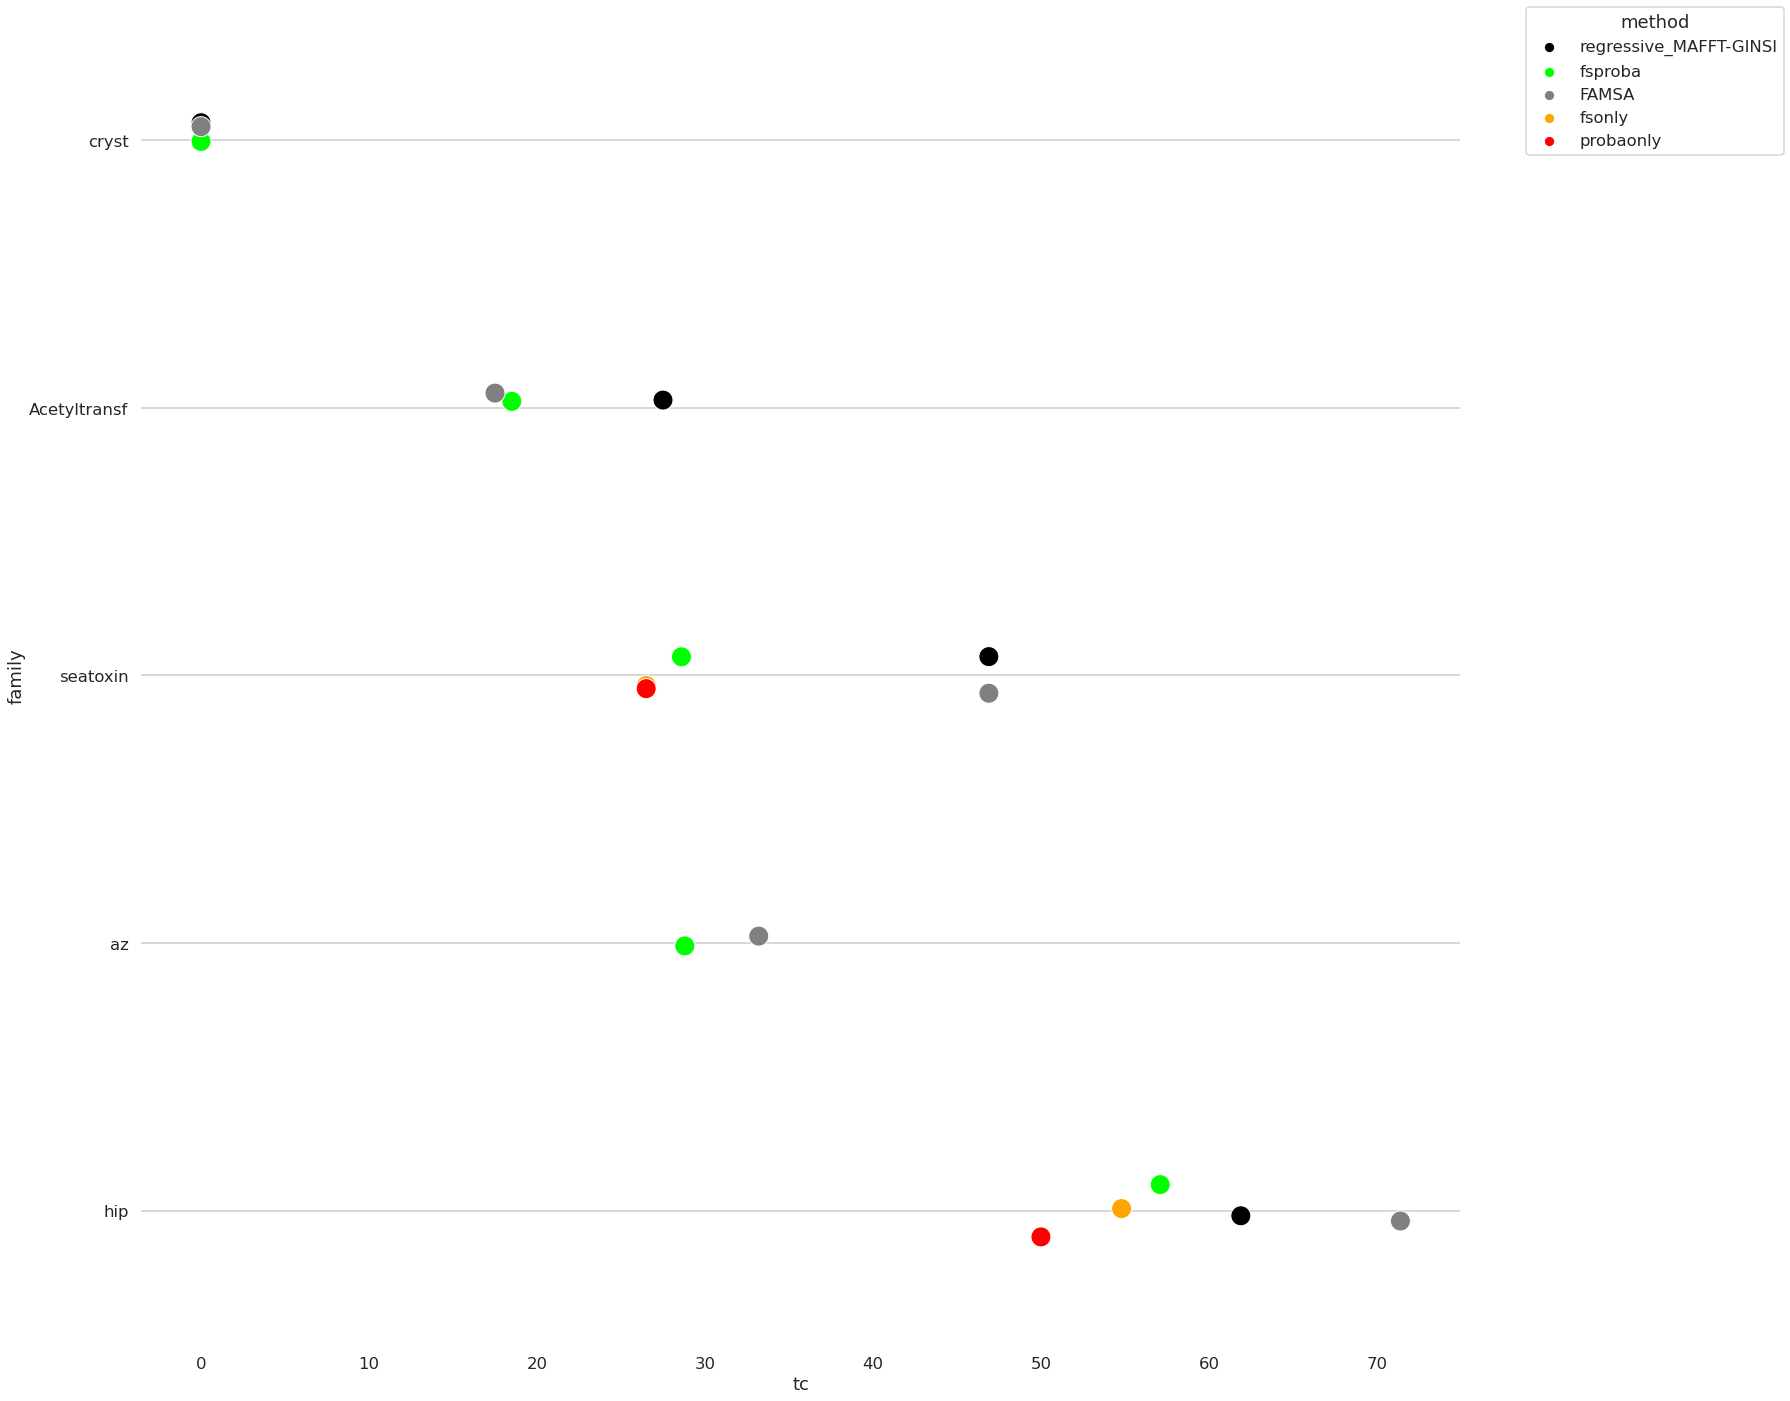

In [13]:
# VISUALIZE 
regressive_mafft = regressive_sequence[regressive_sequence.method == "regressive_MAFFT-GINSI"]
scores = pd.concat([regressive_sequence[cols],tc_fs[cols], famsa[cols], str_coffee[cols]])
scores = pd.concat([regressive_mafft[cols],tc_fs[cols], famsa[cols]])

eval_var = "tc"


import itertools
sns.set_theme(style="whitegrid")
sns.set_context("talk")

sorting_method = "regressive_MAFFT-GINSI"
sorting_method = "fsproba"


sorter = scores[scores.method == sorting_method].sort_values(eval_var).family.to_frame()
scores = pd.merge(sorter,scores, on = "family", how = 'left')

# Create an array with the colors you want to use
colors = list(itertools.chain.from_iterable([["black","#00FF00", "grey", "orange", "red", "pink"],["orange"]*100]))

# colors = ["red", "blue", "grey", "black", "grey", "grey", rep(c("orag"))]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))


g = sns.PairGrid(scores,
                 x_vars=eval_var, y_vars=["family"], hue = "method",
                 height=20, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
       linewidth=1, edgecolor="w")


for ax in g.axes.flat:
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = "method")

In [7]:
scores

,family,sp,tc,method,n_sequences
0,cryst,54.8,0.0,regressive_MAFFT-GINSI,1160
1,cryst,47.6,0.0,regressive_FAMSA,1160
2,cryst,39.6,0.0,fsproba,1160
3,cryst,37.6,0.0,dynamic,1160
4,cryst,45.5,0.0,FAMSA,1160
5,cryst,40.2,0.0,3d_regressive,1160
6,seatoxin,81.2,46.9,regressive_FAMSA,93
7,seatoxin,81.2,46.9,regressive_MAFFT-GINSI,93
8,seatoxin,68.8,28.6,fsproba,93
9,seatoxin,68.1,26.5,fsonly,93


In [14]:
famsa.sort_values("tc")

,name,sp,tc,column,family,method,tree_method,library_method,n_sequences,mean_length,size_group
29,cryst.progressive.FAMSA.MBED,45.5,0.0,0.0,cryst,FAMSA,FAMSA,MBED,1160,80.807759,small
9,trfl.progressive.FAMSA.MBED,42.6,0.7,0.1,trfl,FAMSA,FAMSA,MBED,837,242.315412,small
60,phc.progressive.FAMSA.MBED,67.1,1.1,0.1,phc,FAMSA,FAMSA,MBED,2957,98.471086,small
77,rhv.progressive.FAMSA.MBED,30.7,1.9,0.2,rhv,FAMSA,FAMSA,MBED,17976,143.424010,large
26,KAS.progressive.FAMSA.MBED,46.9,6.8,0.7,KAS,FAMSA,FAMSA,MBED,2070,174.528019,small
...,...,...,...,...,...,...,...,...,...,...,...
55,adh.progressive.FAMSA.MBED,98.6,97.1,97.4,adh,FAMSA,FAMSA,MBED,21331,123.640383,large
28,hr.progressive.FAMSA.MBED,99.4,98.7,98.6,hr,FAMSA,FAMSA,MBED,3707,65.151335,small
54,hla.progressive.FAMSA.MBED,100.0,100.0,100.0,hla,FAMSA,FAMSA,MBED,13465,153.147642,large
4,annexin.progressive.FAMSA.MBED,100.0,100.0,100.0,annexin,FAMSA,FAMSA,MBED,3139,65.190188,small


In [30]:
famsa[famsa.family == "az"]

,name,sp,tc,column,family,method,tree_method,library_method,n_sequences,mean_length,size_group
13,az.progressive.FAMSA.MBED,72.9,33.2,32.2,az,FAMSA,FAMSA,MBED,1086,100.416206,small
